### 正規化をしてテキストファイルに起こすノートブックです

In [4]:
import glob
import math

def split_list(l,n):
    for idx in range(0,len(l)-1,n):
        yield l[idx:idx + n]

def normalize_points(path,xmin,xmax,ymin,ymax,normalize):
    #LiDARからの生のデータを入力してね
    files = glob.glob(path)
    if len(files) == 0:
        print('No data available')
        return 
    with open(files[0],'r') as f:
        data = f.read().split('\n')
    normalize_x = []
    normalize_y = []
    for idx in range(1,len(data)-1):
        d_k = data[idx].replace('(','').replace(')',',').replace('[','').replace(']','')
        sp_ka = d_k.split(',')
        angl = [] #角度
        dist = [] #距離
        result = list(split_list(sp_ka,3))
        for idx in range(len(result)):
            angl.append(float(result[idx][1]))
            dist.append(float(result[idx][2]))

        points_x = []
        points_y = []
        for i in range(len(angl)):
            x = dist[i] * math.cos(math.radians(angl[i])) 
            y = math.sqrt(dist[i] ** 2 - x ** 2) 
            x = x / 10
            y = y / 10
            if(0 <= float(angl[i]) and float(angl[i]) <= 90):
                points_x.append(x)
                points_y.append(-y)
            elif(90 < float(angl[i]) and float(angl[i]) <= 180):
                points_x.append(x)
                points_y.append(-y)
            elif(180 < float(angl[i]) and float(angl[i]) <= 270):
                points_x.append(x)
                points_y.append(y)
            else:
                points_x.append(x)
                points_y.append(y)
        #ここで座標指定をしてしまうのがベスト？

        if normalize == 1:
            if xmin == -1 and xmax == -1:
                xmin = min(points_x)
                xmax = max(points_x)
                ymin = min(points_y)
                ymax = max(points_y)
            human_x = []
            human_y = [] 
            for point_x,point_y in zip(points_x,points_y):
                if xmin <= point_x and point_x <= xmax and ymin <= point_y and point_y <= ymax:
                    human_x.append(point_x)
                    human_y.append(point_y)
            max_points_x = max(human_x)
            min_points_x = min(human_x)
            max_points_y = max(human_y)
            min_points_y = min(human_y)
            bo_x = max_points_x - min_points_x
            bo_y = max_points_y - min_points_y
            n_x = []
            n_y = []
            for h_x in human_x:
                n_x.append((h_x - min_points_x) / bo_x)
            for h_y in human_y:
                n_y.append((h_y - min_points_y) / bo_y)
            normalize_x.append(n_x)
            normalize_y.append(n_y)
        else:
            human_x = []
            human_y = []
            if xmin == -1 and xmax == -1:
                xmin = min(points_x)
                xmax = max(points_x)
                ymin = min(points_y)
                ymax = max(points_y)
            for point_x,point_y in zip(points_x,points_y):
                if xmin <= point_x and point_x <= xmax and ymin <= point_y and point_y <= ymax:
                    human_x.append(point_x)
                    human_y.append(point_y)
            n_x = []
            n_y = []
            for h_x,h_y in zip(human_x,human_y):
                n_x.append(h_x)
                n_y.append(h_y)
            normalize_x.append(n_x)
            normalize_y.append(n_y)
    return normalize_x,normalize_y,normalize

In [9]:
path = r'C:\Users\wtana\Desktop\LiDAR_cm\lidar_txt_files\tree.txt'
#plotの範囲を全部にするならxmin and xmax に-1
#normalizeするなら1
#しないなら0
x,y,no = normalize_points(path,xmin=0,xmax=200,ymin=-100,ymax=100,normalize=1)
#x,y,no = normalize_points(path,xmin=-1,xmax=-1,ymin=0,ymax=500,normalize=0)

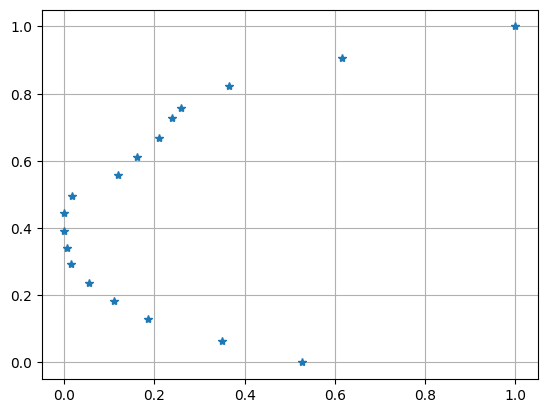

In [10]:
import matplotlib.pyplot as plt
plt.plot(x[6],y[6],linestyle='',marker='*')
plt.grid('TRUE')
#plt.savefig('../md_matome/images/tree_right_normalize.png')

In [11]:
s = ''
for i in range(len(x)):
    s = ''
    with open('./normalize_txt/tree/'+str(i)+'.txt','a') as f:
        for x_,y_ in zip(x[i],y[i]):
            s = s + str(x_) + ' ' + str(y_) + ' 95\n'
        f.write(s)



In [12]:
import glob
import random
file_path = './normalize_txt/tree/*'
files = glob.glob(file_path)
for idx,file in enumerate(files):
    f = open(file,'r')
    data = f.read().split('\n')
    f.close()
    f = open(file,'a')
    for _ in range(33 -len(data)):
        num = random.randint(0,len(data)-10)
        f.write(str(data[num])+'\n')
    f.close()